### Import Libraries

In [1]:
from tensorflow import keras
from astropy.visualization import (ZScaleInterval, ImageNormalize)
from keras import backend as K
import numpy as np
from sklearn import preprocessing
from sklearn import model_selection as md
from keras.models import load_model
from keras.callbacks import EarlyStopping

import os
from keras.regularizers import l2
from matplotlib import pyplot as plt
import tensorflow as tf 
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense,Dropout,BatchNormalization
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from IPython.display import clear_output
from keras import backend
from keras.preprocessing.image import ImageDataGenerator
K.set_image_data_format('channels_last')
from numpy import expand_dims
from keras.preprocessing.image import img_to_array
print ('Done!')

Using TensorFlow backend.


Done!


In [2]:
import keras
# updatable plot
# a minimal example (sort of)
from matplotlib import pyplot as plt
from IPython.display import clear_output
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.accuracy = []
        self.val_accuracy = []
        #self.fig = plt.figure()
        self.logs = []
    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(logs)
        self.x.append(self.i)
        self.accuracy.append(logs.get('accuracy'))
        self.val_accuracy.append(logs.get('val_accuracy'))
        self.i += 1
        clear_output(wait=True)
        plt.plot(self.x, self.accuracy, label="train")
        plt.plot(self.x, self.val_accuracy, label="validation",linestyle='--')
        plt.legend()
        plt.show();      
    def on_train_end(self, logs={}):
        print(self.logs[self.i - 1])
        
plot_losses = PlotLosses()
print('Done!')

Done!


## Make your input and target data. 

In [3]:
## Training data 
inp_tr = np.load('cat_inp_tr.npy', allow_pickle=True)
tar_tr = np.load('cat_tar_tr.npy', allow_pickle=True)
print('Done!')

Done!


In [4]:
## Validation Data
inp_va = np.load('inp_va.npy',allow_pickle=True)
tar_va = np.load('tar_va.npy',allow_pickle=True)
print('Done!')

Done!


In [5]:
## Test Set
#inp_te = np.load('input_test.npy',allow_pickle=True)
#tar_te = np.load('target_test.npy',allow_pickle=True)
#print('Done!')

In [6]:
print (np.shape(inp_tr), np.shape(tar_tr))
print (np.shape(inp_va), np.shape(tar_va))

(42204, 216, 384, 3) (42204,)
(3802, 216, 384, 3) (3802,)


## Then normalize the input

In [ ]:
inp_tr = inp_tr.astype('float32') / 255.
inp_va = inp_va.astype('float32') / 255.
print('Done!')

In [ ]:
print (np.shape(inp_tr), np.shape(tar_tr))
print (np.shape(inp_va), np.shape(tar_va))

## One-hot encoded vectors

In [ ]:
from keras.utils import to_categorical
tar_tr3 = to_categorical(tar_tr)
tar_va3 = to_categorical(tar_va)

In [ ]:
print (np.shape(inp_tr), np.shape(tar_tr3))
print (np.shape(inp_va), np.shape(tar_va3))

## Check loaded dataset 

In [ ]:
print(inp_tr[0])

In [ ]:
num = 163
print(tar_va3[num])
print(tar_va[num])
plt.imshow(inp_va[num])

In [ ]:
#lrelu = lambda x: tf.keras.activations.relu(x, alpha=0.1)

## CNN, the first layer
main_input = Input(shape=(216, 384,3),dtype='float32', name='main_input')
c1= Conv2D(16, kernel_size=(2,2), activation='relu', padding='same')(main_input)
c1 = MaxPooling2D(pool_size=(2, 2))(c1)

## CNN, the second layer
c1= Conv2D(32, kernel_size=(2,2), activation='relu', padding='same')(c1)
c1 = MaxPooling2D(pool_size=(2, 2))(c1)
c1 = BatchNormalization()(c1)

## CNN, the third layer
c1= Conv2D(32, kernel_size=(2,2), activation='relu', padding='same')(c1)
c1 = MaxPooling2D(pool_size=(2, 2))(c1)


## CNN, the fourth layer
c1= Conv2D(64, kernel_size=(2,2), activation='relu', padding='same')(c1)
c1 = MaxPooling2D(pool_size=(2, 2))(c1)


## CNN, the fifth layer
c1= Conv2D(128, kernel_size=(2,2), activation='relu', padding='same')(c1)
c1 = MaxPooling2D(pool_size=(2, 2))(c1)




## Flatten data
flat = Flatten(name='flat')(c1)


##fully connected layer(s)
x1 = Dense(256, activation='relu')(flat)
x1 = Dropout(0.35)(x1)

x1 = Dense(128, activation='relu')(x1)
x1 = Dropout(0.35)(x1)

x1 = Dense(64, activation='relu')(x1)
x1 = Dropout(0.35)(x1)

main_output = Dense(5, activation='softmax', name='main_output')(x1)
#output of the layer will go to the activation function


model = Model(inputs=main_input,outputs=main_output)


model.compile(loss= ['categorical_crossentropy'], optimizer='Adam',metrics=['accuracy'])
# optimizer will optimize the prameter of the model


model.summary()



 ## Train

In [ ]:
batch_size = 128
epochs = 50



early_stopping = EarlyStopping(monitor='val_accuracy', patience=4)


model.fit(inp_tr ,tar_tr3, validation_split= 0.2, shuffle=True, epochs=epochs, batch_size=batch_size ,callbacks=[plot_losses, early_stopping])
#,callbacks=[plot_losses]

## Save your mode if it is OK

In [23]:
model.save('modelWithCameraImages2.h5')

## Load your mode if you have one

In [2]:
model= load_model('modelWithCameraImages2.h5')

In [3]:
## Video test
inp_te = np.load('input_test.npy', allow_pickle=True)
tar_te = np.load('target_test.npy', allow_pickle=True)
print('Done!')
inp_te = inp_te.astype('float32') / 255.
print (np.shape(inp_te), np.shape(tar_te))

Done!
(3290, 216, 384, 3) (3290,)


1


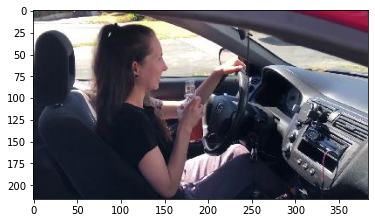

In [20]:
num = 1463
print(tar_te[num])
plt.imshow(inp_te[num])

## predictions

In [4]:
Per_va= model.predict(inp_te)
print(Per_va)


[[1.0000000e+00 9.1490389e-13 8.4076053e-12 3.7926797e-11 4.8938859e-10]
 [1.0000000e+00 7.5388534e-13 8.2270392e-14 2.1705792e-11 2.8350541e-11]
 [1.0000000e+00 3.8681948e-13 1.1301703e-14 9.2888310e-12 9.8182434e-12]
 ...
 [2.9644478e-19 2.2019291e-29 1.2222128e-18 9.3886756e-33 1.0000000e+00]
 [4.5369377e-16 2.3693331e-25 2.1172179e-15 3.7886485e-28 1.0000000e+00]
 [5.3115246e-17 2.7636716e-29 4.6375147e-17 2.7868112e-31 1.0000000e+00]]


## usefull plots, Analisis, ROC, evaluations

In [5]:
Per_class = np.zeros(len(tar_te))

i = 0
for nv in Per_va:
   Per_class[i] = np.argmax(nv)
   i = i+1
 
print(len(Per_class))
print(Per_class)

3290
[0. 0. 0. ... 4. 4. 4.]


Confusion matrix, without normalization
[[1063    2    0    2   19]
 [   2  542    0    0    0]
 [   0    0  520    0    0]
 [   0    0    0  231    0]
 [   1    0    3    0  905]]
Normalized confusion matrix
[[0.98 0.   0.   0.   0.02]
 [0.   1.   0.   0.   0.  ]
 [0.   0.   1.   0.   0.  ]
 [0.   0.   0.   1.   0.  ]
 [0.   0.   0.   0.   1.  ]]
Accuracy score: 0.9911854103343465
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1086
           1       1.00      1.00      1.00       544
           2       0.99      1.00      1.00       520
           3       0.99      1.00      1.00       231
           4       0.98      1.00      0.99       909

    accuracy                           0.99      3290
   macro avg       0.99      0.99      0.99      3290
weighted avg       0.99      0.99      0.99      3290



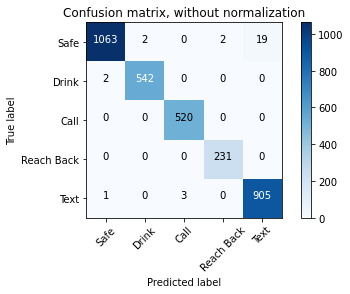

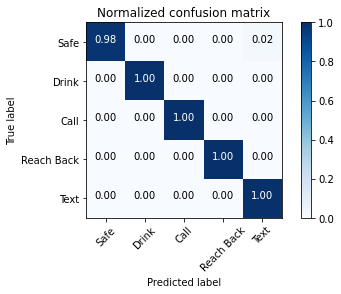

In [6]:
tar_cm= tar_te
Per_cm = Per_class


import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score, classification_report




def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
   """
   This function prints and plots the confusion matrix.
   Normalization can be applied by setting `normalize=True`.
   """
   if normalize:
       cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
       print("Normalized confusion matrix")
   else:
       print('Confusion matrix, without normalization')

   print(cm)

   plt.imshow(cm, interpolation='nearest', cmap=cmap)
   plt.title(title)
   plt.colorbar()
   tick_marks = np.arange(len(classes))
   plt.xticks(tick_marks, classes, rotation=45)
   plt.yticks(tick_marks, classes)

   fmt = '.2f' if normalize else 'd'
   thresh = cm.max() / 2.
   for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
       plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

   plt.tight_layout()
   plt.ylabel('True label')
   plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(tar_cm, Per_cm)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Safe', 'Drink', 'Call', 'Reach Back', 'Text'],
                     title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Safe', 'Drink', 'Call', 'Reach Back', 'Text'], normalize=True,
                     title='Normalized confusion matrix')

#Compute accuracy score, precision, recall
print('Accuracy score:', accuracy_score(tar_cm, Per_cm))
print(classification_report(tar_cm, Per_cm))


plt.show()



In [10]:
print(tar_te)
print(Per_class)
true_label = 2
i = 0
for num in tar_te:
    if tar_te[i] == true_label:
        if Per_class[i] != tar_te[i]:
           # if(Per_class[i] == 0):
                print("True: %d, Predicted: %d" % (tar_te[i], Per_class[i]))
                print(i)
                plt.imshow(inp_te[i])
                plt.show()
    i = i + 1
    
#  0: Safe   1: Drink    2: Call    3: Reach back       4: Text

[0 0 0 ... 4 4 4]
[0. 0. 0. ... 4. 4. 4.]


## ADD the ROC plot here 